In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
mpl.rcParams.update(mpl.rcParamsDefault)

In [9]:
# Load the CSV file into a NumPy array
data = np.loadtxt('output_Z4_notrandom.csv', delimiter=',')

# Extraer parametros para probar acoples no imaginarios

mass_1 = data[:, 0]

mass_2 = data[:, 2]

ls1 = data[:, 5]

ls2 = data[:, 6]

# Extraer la columna de densidad de reliquia total
omega_column = data[:, -2] + 2*data[:, -3]

cond1 = (0.11 < omega_column)

cond2 = (omega_column < 0.13)

cond3 = ((mass_1**2 - 1/2 * ls1 * 246**2) > 0)

cond4 = ((mass_2**2 - 1/2 * ls2 * 246**2) > 0)

cond5 = (mass_2 < mass_1)

condtot = cond1*cond2*cond3*cond4*cond5

# Filtrar los valores que esten en el intervalo
data_filtered = data[condtot, :]

In [10]:
print(data_filtered.shape)

(788, 12)


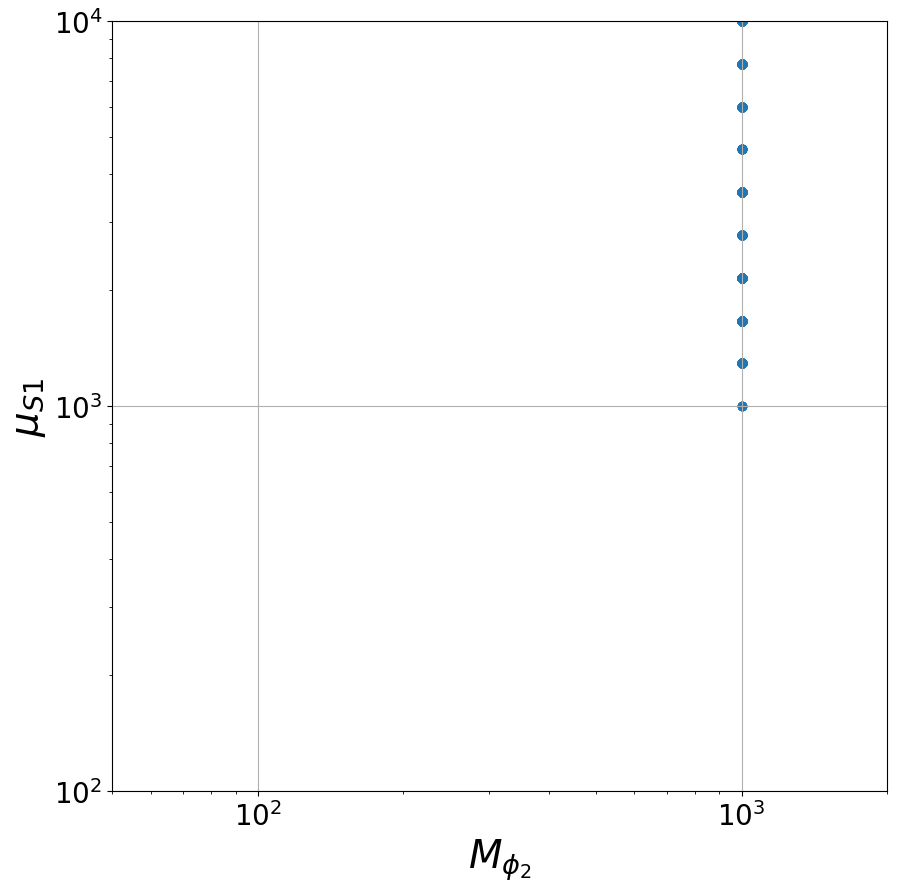

In [11]:
plt.figure(figsize=(10,10))
plt.scatter(data_filtered[:,2],data_filtered[:,7])
plt.xscale('log')
plt.yscale('log')

plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel(r"$\mu_{S1}$", size=28)
plt.xlabel(r"$M_{\phi_2}$", size=28)
plt.xlim(5e1,2e3)
plt.ylim(1e2,1e4)
plt.grid()
plt.savefig("relicdensity0.png")
plt.show()

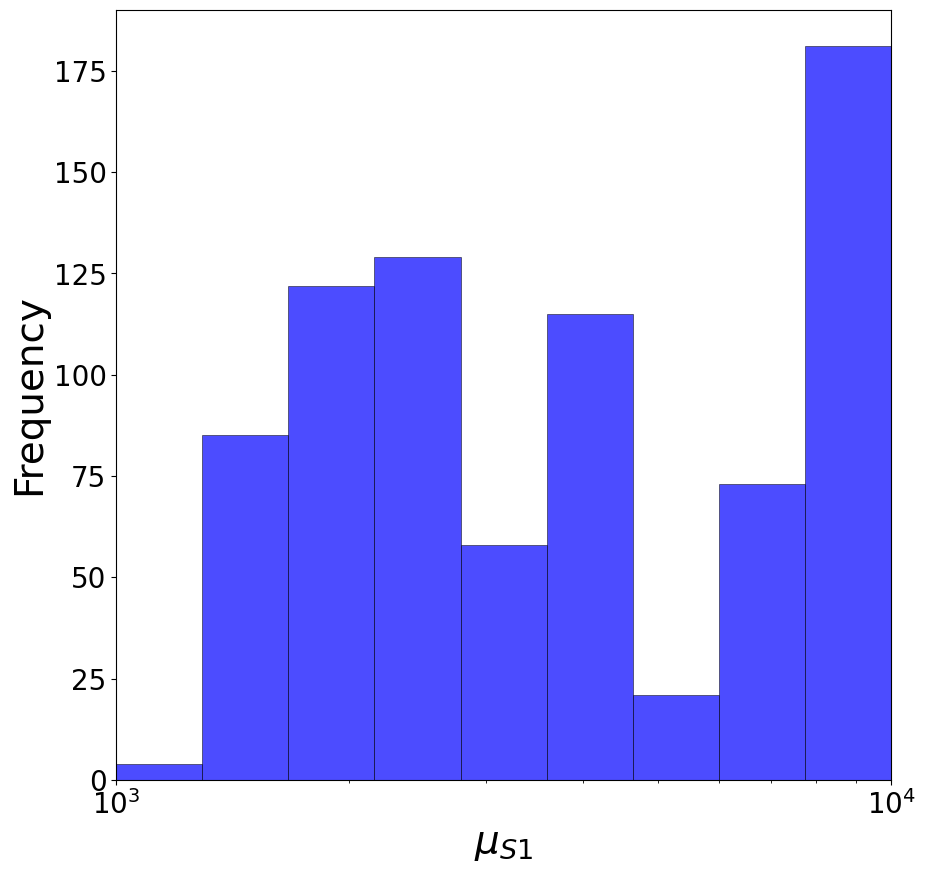

In [12]:
plt.figure(figsize=(10, 10)) 

unique_values = np.unique(data_filtered[:, 7])

plt.hist(data_filtered[:, 7], bins=unique_values, color='blue', alpha=0.7, edgecolor='black', linewidth=0.5)  
plt.xlabel(r"$\mu_{S1}$", size=28)  
plt.ylabel('Frequency', size=28)  
plt.grid()

plt.xlim([1e3,1e4])

plt.xticks(size=20)
plt.yticks(size=20)
plt.grid()

plt.xscale('log')

plt.savefig("histogram.png")  
plt.show()

<Figure size 1000x1000 with 0 Axes>

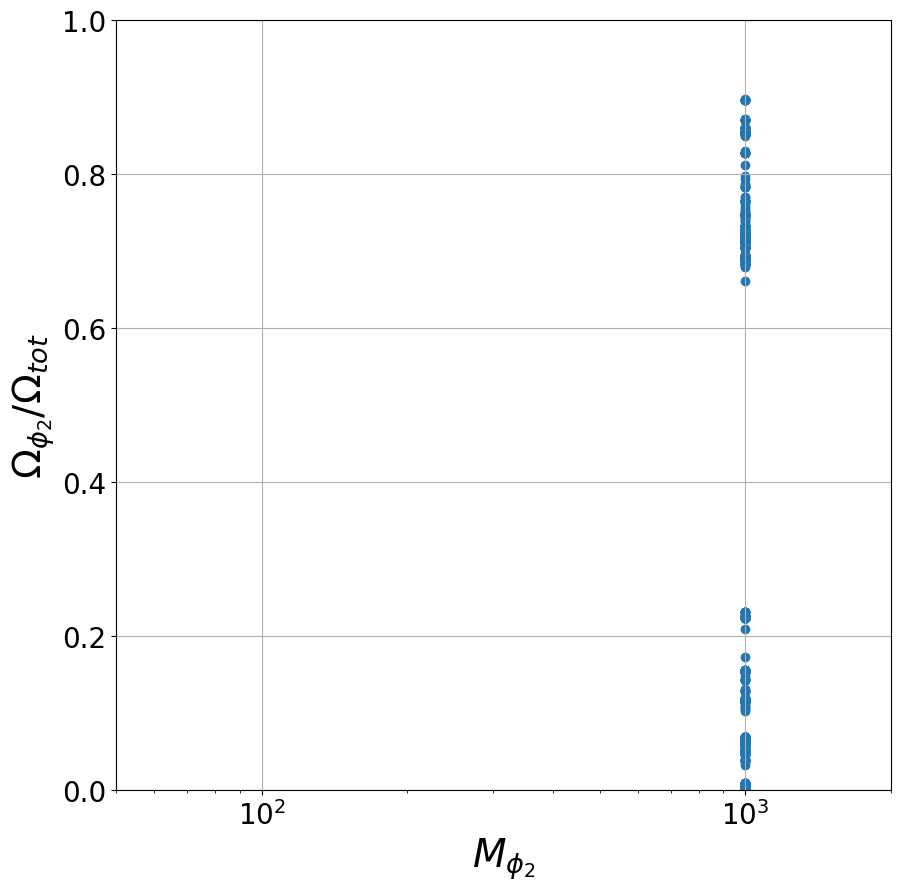

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(data_filtered[:,2],data_filtered[:,-2]/(data_filtered[:, -2] + 2*data_filtered[:, -3]))
plt.xscale('log')

plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel(r"$\Omega_{\phi_2} / \Omega_{tot}$", size=28)
plt.xlabel(r"$M_{\phi_2}$", size=28)
plt.xlim(5e1,2e3)
plt.ylim(0,1)
plt.grid()
plt.savefig("relicdensity1.png")
plt.show()

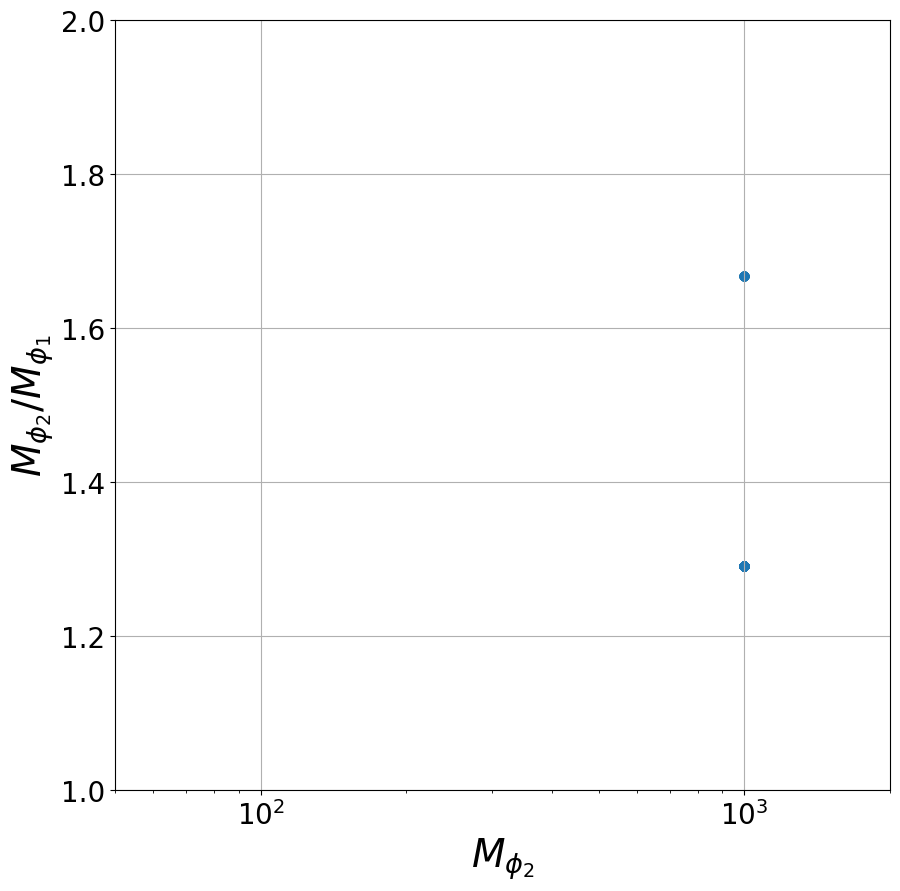

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(data_filtered[:,2],data_filtered[:,0]/(data_filtered[:,2]))
plt.xscale('log')

plt.xticks(size=20)
plt.yticks(size=20)
plt.ylabel(r"$M_{\phi_2} / M_{\phi_1} $", size=28)
plt.xlabel(r"$M_{\phi_2}$", size=28)
plt.xlim(5e1,2e3)
plt.ylim(1,2)
plt.grid()
plt.savefig("relicdensity2.png")
plt.show()